# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [155]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode, binom, norm, poisson

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [156]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_lenght']= df['title'].str.len()

df

,star_rating,title,content_rating,genre,duration,actors_list,title_lenght
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [157]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_lenght'].mean()
mediana = df['title_lenght'].median()
moda = df['title_lenght'].mode()

print(f'El promedio es', media)
print(f'La mediana es', mediana)
print(f'La moda es', moda)

El promedio es 15.481103166496425
La mediana es 14.0
La moda es 0    12
Name: title_lenght, dtype: int64


In [158]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_lenght'].max()-df['title_lenght'].min()
varianza = df['title_lenght'].var()
desviacion = df['title_lenght'].std()

print(f'El rango es', rango)
print(f'La varianza es', varianza)
print(f'La desviacion estandar es', desviacion)

El rango es 67
La varianza es 72.1067488840288
La desviacion estandar es 8.491569282766807


In [10]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = df['title_lenght'].skew()
curtosis = df['title_lenght'].kurtosis()

print(f'La asimetria es', asimetria, 'por tanto es una asimetria positiva desplazada a la derecha')
print(f'El valor de curtosis es', curtosis, 'por tanto, tenemos una curtosis leptocurtica, con mayor probabilidad de encontrar outliers')

La asimetria es 1.5252523464631278 por tanto es una asimetria positiva desplazada a la derecha
El valor de curtosis es 3.8122887061291544 por tanto, tenemos una curtosis leptocurtica, con mayor probabilidad de encontrar outliers


In [11]:
# Imprime el título más corto y el título más largo según su longitud
print(f'Segun su longitud, el titulo mas corto tiene', df['title_lenght'].min(),'caracter,', 'mientras que, el mas largo tiene', df['title_lenght'].max(), 'caracteres')

Segun su longitud, el titulo mas corto tiene 1 caracter, mientras que, el mas largo tiene 68 caracteres


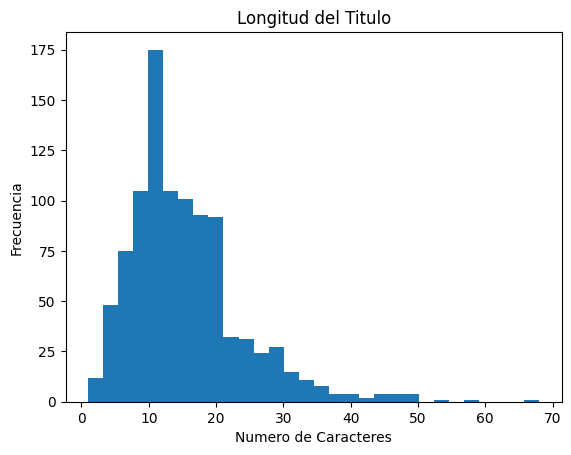

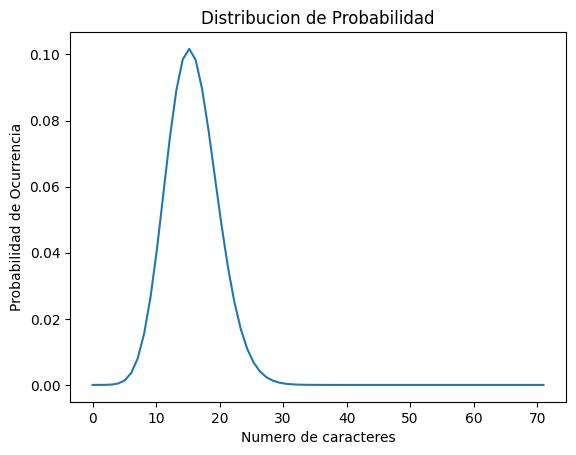

La mayor probabilidad de ocurrencia se encuentra en los titulos que poseen de 10 a 20 caracteres, tal y como se aprecia en el histograma y en la densidad de probabilidad.


In [165]:
# grafica tus resultados

#Histograma
plt.hist(df['title_lenght'], bins=30)

plt.title("Longitud del Titulo")
plt.xlabel("Numero de Caracteres")
plt.ylabel("Frecuencia")

plt.show()

#Funcion de Probabilidad de Masa de Poisson
xaxis = np.linspace(0,71,71)
plt.plot(xaxis, poisson.pmf(range(71),media))


plt.title("Distribucion de Probabilidad")
plt.xlabel('Numero de caracteres')
plt.ylabel('Probabilidad de Ocurrencia')

plt.show()

#Conclusion
print('La mayor probabilidad de ocurrencia se encuentra en los titulos que poseen de 10 a 20 caracteres, tal y como se aprecia en el histograma y en la densidad de probabilidad.')

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [ ]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
lista = [int(df['title_lenght'].loc[i]) for i in range(5)]
print(lista)

[24, 13, 22, 15, 12]


In [97]:
# Calcula la media de los 5 valores
lista_media = sum(lista)/len(lista)
lista_media

17.2

In [93]:
# Calcula las diferencias al cuadrado con respecto a la media
diff_lista = [(lista_media-s)**2 for s in lista]

diff_lista

[46.24000000000001,
 17.639999999999993,
 23.040000000000006,
 4.839999999999997,
 27.039999999999992]

In [ ]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
var_lista = sum(diff_lista)/(len(diff_lista)-1)
desv_lista = (var_lista)**0.5

print(f'La varianza es',var_lista)
print(f'La desviacion estandar es', desv_lista)


La varianza es 29.700000000000003
La desviacion estandar es 5.449770637375485
0    29.7
dtype: float64 0    5.449771
dtype: float64
